In [206]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import hist
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import category_encoders as ce 


/Users/xiuxuming/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


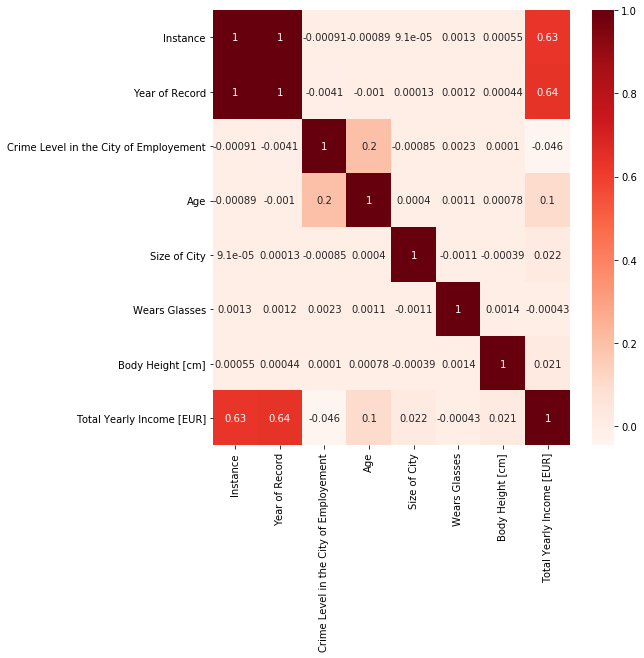

In [207]:
df_train = pd.read_csv('train.csv')
plt.figure(figsize=(8,8))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

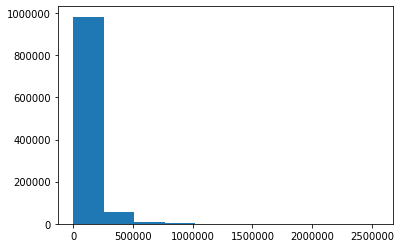

In [208]:
# df_train = df_train[df_train['Total Yearly Income [EUR]'] > 0]
# df_train = df_train[df_train['Total Yearly Income [EUR]'] < 5000000]
y = df_train['Total Yearly Income [EUR]']
#y = np.log(y)
plt.hist(y)
plt.show()

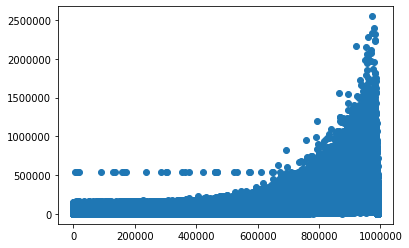

In [209]:
x = df_train['Instance']
plt.scatter(x,y)
plt.show()
# looks like the data is sorted already

In [210]:
df_train

Instance  Year of Record Housing Situation  \
0               1          1940.0                 0   
1               2          1940.0                 0   
2               3          1940.0                 0   
3               4          1940.0                 0   
4               5          1940.0                 0   
5               6          1940.0                 0   
6               7          1940.0                 0   
7               8          1940.0                 0   
8               9          1940.0                 0   
9              10          1940.0                 0   
10             11          1940.0                 0   
11             12          1940.0                 0   
12             13          1940.0                 0   
13             14          1940.0                 0   
14             15          1940.0                 0   
15             16          1940.0                 0   
16             17          1940.0                 0   
17             18          1940.0                 0   
18             19          1940.0                 0   
19             20          1940.0                 0   
20             21          1940.0                 0   
21             22          1940.0                 0   
22             23          1940.0                 0   
23             24          1940.0                 0   
24             25          1940.0                 0   
25             26          1940.0                 0   
26             27          1940.0                 0   
27             28          1940.0                 0   
28             29          1940.0                 0   
29             30          1940.0                 0   
...           ...             ...               ...   
1048544    991680             NaN   Large Apartment   
1048545    991681             NaN                 0   
1048546    991682             NaN  Medium Apartment   
1048547    991683             NaN            Castle   
1048548    991684             NaN                 0   
1048549    991685             NaN       Large House   
1048550    991686             NaN   Large Apartment   
1048551    991687             NaN      Medium House   
1048552    991688             NaN       Large House   
1048553    991689             NaN       Large House   
1048554    991690             NaN       Small House   
1048555    991691             NaN       Small House   
1048556    991692             NaN      Medium House   
1048557    991693             NaN                 0   
1048558    991694             NaN       Large House   
1048559    991695             NaN  Medium Apartment   
1048560    991696             NaN   Large Apartment   
1048561    991697             NaN       Small House   
1048562    991698             NaN   Large Apartment   
1048563    991699             NaN   Large Apartment   
1048564    991700             NaN      Medium House   
1048565    991701             NaN       Small House   
1048566    991702             NaN                nA   
1048567    991703             NaN   Large Apartment   
1048568    991704             NaN  Medium Apartment   
1048569    991705             NaN   Large Apartment   
1048570    991706             NaN                 0   
1048571    991707             NaN  Medium Apartment   
1048572    991708             NaN            Castle   
1048573    991709             NaN                 0   

         Crime Level in the City of Employement  \
0                                            33   
1                                            25   
2                                            34   
3                                            70   
4                                            51   
5                                            61   
6                                            58   
7                                            51   
8                                            68   
9                                            60   
10                                   

In [211]:
df_test = pd.read_csv('test.csv')
print(len(df_test))
print(len(df_train))

369438
1048574


/Users/xiuxuming/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [212]:
def encoding_all(df_train, df_test):
    df = pd.concat([df_train, df_test])
    print(len(df))
    df_y = df['Total Yearly Income [EUR]']
    df = df.drop('Total Yearly Income [EUR]', axis =1)
    df_instance = df['Instance']
    df= df.drop('Instance', axis=1)
    
    df['Housing Situation'] = df['Housing Situation'].replace('0',np.nan)
    df['Housing Situation'] = df['Housing Situation'].replace('nA',np.nan)
    df['Gender'] = df['Gender'].replace('0',np.nan)
    df['Work Experience in Current Job [years]'] = df['Work Experience in Current Job [years]'].replace('#NUM!',np.nan)
    df['Work Experience in Current Job [years]'] = df['Work Experience in Current Job [years]'].astype(float)
    
    for col in df.columns:
        if df[col].dtype == object:
            df[col] = df[col].fillna(df[col].mode())
        else:
            df[col] = df[col].fillna(df[col].median())
    
    # scaling data 
#     std = StandardScaler()
#     df['Age'] = std.fit_transform(df['Age'].values.reshape(-1,1))
#     df['Body Height [cm]'] = std.fit_transform(df['Body Height [cm]'].values.reshape(-1,1))
#     df['Size of City'] = std.fit_transform(df['Size of City'].values.reshape(-1,1))
#     df.drop('Hair Color',axis =1,inplace = True)
#     df.drop('Wears Glasses',axis =1,inplace =True)
    
    #binary encoding
    be = ce.TargetEncoder(cols=['Housing Situation','Satisfation with employer','Gender','Country','Profession','University Degree','Hair Color','Yearly Income in addition to Salary (e.g. Rental Income)'])
    df = be.fit_transform(df,df_y)
    
    #normalization 
    
    std = StandardScaler()
    df_values = df.values
    df_values = std.fit_transform(df_values)
    df.loc[:,:] = df_values
   
    df_train = df[:1048574]
    df_test = df[-(len(df)-1048574):]
    
    print(len(df_train))
    print(len(df_test))
    return df_train, df_test


In [213]:
df_train, df_test = encoding_all(df_train, df_test)

1418012
1048574
369438


In [214]:
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.15)


In [215]:
regressor = CatBoostRegressor(iterations =1000, learning_rate=0.1,max_depth=8,random_state=75)
model = regressor.fit(X_train,y_train)
print (model.score(X_test,y_test))
y_pred = regressor.predict(X_test)
print (r2_score(y_test, y_pred))
print ('root mean square error:',np.sqrt(mean_squared_error(y_test,y_pred)))

0:	learn: 103107.6843696	total: 84.7ms	remaining: 1m 24s
1:	learn: 95406.9153050	total: 146ms	remaining: 1m 12s
2:	learn: 88525.8906815	total: 201ms	remaining: 1m 6s
3:	learn: 82384.6267792	total: 257ms	remaining: 1m 4s
4:	learn: 76941.3406389	total: 322ms	remaining: 1m 4s
5:	learn: 72156.5271946	total: 380ms	remaining: 1m 3s
6:	learn: 67908.1361151	total: 436ms	remaining: 1m 1s
7:	learn: 64028.0516575	total: 494ms	remaining: 1m 1s
8:	learn: 60611.4283373	total: 551ms	remaining: 1m
9:	learn: 57608.5378075	total: 609ms	remaining: 1m
10:	learn: 54831.4981996	total: 665ms	remaining: 59.8s
11:	learn: 52518.9585186	total: 721ms	remaining: 59.3s
12:	learn: 50182.5369058	total: 786ms	remaining: 59.7s
13:	learn: 48251.4216751	total: 845ms	remaining: 59.5s
14:	learn: 46615.7182464	total: 899ms	remaining: 59s
15:	learn: 44989.0400938	total: 955ms	remaining: 58.8s
16:	learn: 43639.6753674	total: 1.02s	remaining: 58.8s
17:	learn: 42303.6806943	total: 1.08s	remaining: 58.8s
18:	learn: 41246.1146593

151:	learn: 25841.0825755	total: 9.07s	remaining: 50.6s
152:	learn: 25833.3913092	total: 9.13s	remaining: 50.5s
153:	learn: 25819.5352199	total: 9.19s	remaining: 50.5s
154:	learn: 25809.0630719	total: 9.25s	remaining: 50.4s
155:	learn: 25781.3492898	total: 9.32s	remaining: 50.4s
156:	learn: 25770.3674719	total: 9.38s	remaining: 50.3s
157:	learn: 25742.8452654	total: 9.43s	remaining: 50.3s
158:	learn: 25725.9889328	total: 9.48s	remaining: 50.2s
159:	learn: 25706.3333447	total: 9.54s	remaining: 50.1s
160:	learn: 25693.3211306	total: 9.6s	remaining: 50s
161:	learn: 25680.1837710	total: 9.65s	remaining: 49.9s
162:	learn: 25672.1449682	total: 9.7s	remaining: 49.8s
163:	learn: 25661.7842943	total: 9.75s	remaining: 49.7s
164:	learn: 25648.5123570	total: 9.8s	remaining: 49.6s
165:	learn: 25643.3874003	total: 9.85s	remaining: 49.5s
166:	learn: 25635.0031746	total: 9.9s	remaining: 49.4s
167:	learn: 25628.7442177	total: 9.96s	remaining: 49.3s
168:	learn: 25614.3073437	total: 10s	remaining: 49.3s


301:	learn: 24477.0082969	total: 17.7s	remaining: 40.9s
302:	learn: 24469.0888925	total: 17.7s	remaining: 40.8s
303:	learn: 24461.4555127	total: 17.8s	remaining: 40.8s
304:	learn: 24455.8232208	total: 17.9s	remaining: 40.7s
305:	learn: 24451.2729966	total: 17.9s	remaining: 40.6s
306:	learn: 24445.2706185	total: 18s	remaining: 40.6s
307:	learn: 24442.1144906	total: 18s	remaining: 40.5s
308:	learn: 24437.1216191	total: 18.1s	remaining: 40.4s
309:	learn: 24430.7619767	total: 18.1s	remaining: 40.4s
310:	learn: 24424.6383576	total: 18.2s	remaining: 40.3s
311:	learn: 24416.7032264	total: 18.2s	remaining: 40.2s
312:	learn: 24407.3951951	total: 18.3s	remaining: 40.1s
313:	learn: 24400.6670518	total: 18.3s	remaining: 40.1s
314:	learn: 24392.7089473	total: 18.4s	remaining: 40s
315:	learn: 24382.8603545	total: 18.5s	remaining: 40s
316:	learn: 24378.7851039	total: 18.5s	remaining: 39.9s
317:	learn: 24375.8978072	total: 18.6s	remaining: 39.8s
318:	learn: 24368.3660332	total: 18.6s	remaining: 39.7s


451:	learn: 23746.2955096	total: 26.5s	remaining: 32.1s
452:	learn: 23740.7477302	total: 26.5s	remaining: 32s
453:	learn: 23734.4295661	total: 26.6s	remaining: 32s
454:	learn: 23731.1105585	total: 26.7s	remaining: 31.9s
455:	learn: 23726.1823757	total: 26.7s	remaining: 31.9s
456:	learn: 23722.1491445	total: 26.8s	remaining: 31.8s
457:	learn: 23719.4122550	total: 26.8s	remaining: 31.8s
458:	learn: 23714.1514900	total: 26.9s	remaining: 31.7s
459:	learn: 23710.2409785	total: 27s	remaining: 31.6s
460:	learn: 23708.3278000	total: 27s	remaining: 31.6s
461:	learn: 23705.0627999	total: 27.1s	remaining: 31.5s
462:	learn: 23698.6100905	total: 27.1s	remaining: 31.5s
463:	learn: 23693.0932169	total: 27.2s	remaining: 31.4s
464:	learn: 23689.7464174	total: 27.2s	remaining: 31.3s
465:	learn: 23687.4249518	total: 27.3s	remaining: 31.3s
466:	learn: 23682.5031860	total: 27.4s	remaining: 31.2s
467:	learn: 23679.8155735	total: 27.4s	remaining: 31.2s
468:	learn: 23671.5509533	total: 27.5s	remaining: 31.1s


599:	learn: 23232.1248020	total: 35.2s	remaining: 23.5s
600:	learn: 23230.3452993	total: 35.3s	remaining: 23.4s
601:	learn: 23228.4186089	total: 35.3s	remaining: 23.4s
602:	learn: 23225.7874960	total: 35.4s	remaining: 23.3s
603:	learn: 23221.7106975	total: 35.4s	remaining: 23.2s
604:	learn: 23219.5021688	total: 35.5s	remaining: 23.2s
605:	learn: 23217.0646552	total: 35.6s	remaining: 23.1s
606:	learn: 23213.3869814	total: 35.6s	remaining: 23.1s
607:	learn: 23208.7174908	total: 35.7s	remaining: 23s
608:	learn: 23204.3479615	total: 35.8s	remaining: 23s
609:	learn: 23202.0216148	total: 35.8s	remaining: 22.9s
610:	learn: 23199.3815735	total: 35.9s	remaining: 22.8s
611:	learn: 23197.4151589	total: 36s	remaining: 22.8s
612:	learn: 23195.2255800	total: 36s	remaining: 22.7s
613:	learn: 23194.0285766	total: 36.1s	remaining: 22.7s
614:	learn: 23191.2028304	total: 36.1s	remaining: 22.6s
615:	learn: 23189.8708306	total: 36.2s	remaining: 22.6s
616:	learn: 23183.2241945	total: 36.3s	remaining: 22.5s


748:	learn: 22825.3664495	total: 44.1s	remaining: 14.8s
749:	learn: 22823.0060315	total: 44.1s	remaining: 14.7s
750:	learn: 22821.0477140	total: 44.2s	remaining: 14.7s
751:	learn: 22817.7536651	total: 44.3s	remaining: 14.6s
752:	learn: 22814.4740940	total: 44.3s	remaining: 14.5s
753:	learn: 22811.8776143	total: 44.4s	remaining: 14.5s
754:	learn: 22807.5398960	total: 44.4s	remaining: 14.4s
755:	learn: 22805.1523765	total: 44.5s	remaining: 14.4s
756:	learn: 22802.8990493	total: 44.6s	remaining: 14.3s
757:	learn: 22799.6744481	total: 44.6s	remaining: 14.2s
758:	learn: 22797.3546834	total: 44.7s	remaining: 14.2s
759:	learn: 22793.2262400	total: 44.7s	remaining: 14.1s
760:	learn: 22790.6043162	total: 44.8s	remaining: 14.1s
761:	learn: 22789.6238297	total: 44.8s	remaining: 14s
762:	learn: 22788.0125848	total: 44.9s	remaining: 13.9s
763:	learn: 22786.6575973	total: 44.9s	remaining: 13.9s
764:	learn: 22783.5097093	total: 45s	remaining: 13.8s
765:	learn: 22780.6203643	total: 45s	remaining: 13.8

896:	learn: 22481.0823133	total: 52.8s	remaining: 6.07s
897:	learn: 22479.2386469	total: 52.9s	remaining: 6.01s
898:	learn: 22476.9386780	total: 52.9s	remaining: 5.95s
899:	learn: 22474.2111412	total: 53s	remaining: 5.89s
900:	learn: 22472.3549992	total: 53.1s	remaining: 5.83s
901:	learn: 22471.2062263	total: 53.1s	remaining: 5.77s
902:	learn: 22469.6360699	total: 53.2s	remaining: 5.71s
903:	learn: 22467.7359313	total: 53.2s	remaining: 5.65s
904:	learn: 22465.7907372	total: 53.3s	remaining: 5.59s
905:	learn: 22464.3436183	total: 53.3s	remaining: 5.53s
906:	learn: 22461.8522870	total: 53.4s	remaining: 5.47s
907:	learn: 22459.9445548	total: 53.5s	remaining: 5.42s
908:	learn: 22458.3221943	total: 53.5s	remaining: 5.36s
909:	learn: 22456.2686868	total: 53.6s	remaining: 5.3s
910:	learn: 22455.3603264	total: 53.6s	remaining: 5.24s
911:	learn: 22454.1466694	total: 53.7s	remaining: 5.18s
912:	learn: 22452.2896521	total: 53.7s	remaining: 5.12s
913:	learn: 22451.0808129	total: 53.8s	remaining: 5

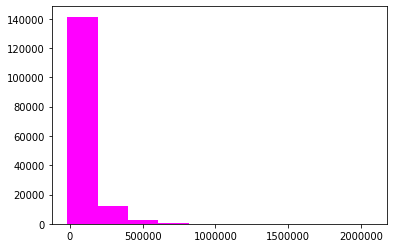

In [216]:
plt.hist(y_pred, color = 'magenta')
#plt.plot(y_pred, color = 'green')
plt.show()

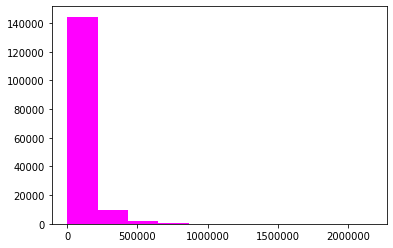

In [217]:
plt.hist(y_test, color = 'magenta')
#plt.plot(y_pred, color = 'green')
plt.show()

369438


(array([3.27128e+05, 3.22360e+04, 7.27500e+03, 1.97700e+03, 5.56000e+02,
        1.87000e+02, 5.40000e+01, 2.10000e+01, 2.00000e+00, 2.00000e+00]),
 array([ -19432.98751724,  177531.85652578,  374496.7005688 ,
         571461.54461183,  768426.38865485,  965391.23269787,
        1162356.0767409 , 1359320.92078392, 1556285.76482694,
        1753250.60886997, 1950215.45291299]),
 <a list of 10 Patch objects>)

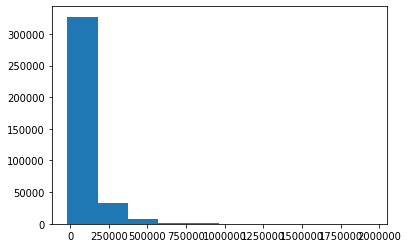

In [218]:
y_pred = regressor.predict(df_test)
print (len(y_pred))
plt.hist(y_pred)

In [221]:

res1 = []
res2 = []
counter = 0
for num in y_pred:
    counter +=1
    res1.append(counter)
    res2.append(num)

df_res1 = pd.DataFrame(res1,columns=['Instance'])
df_res1['Total Yearly Income [EUR]'] = res2
print (df_res1)
df_res1.to_csv('submission.csv',index=False)

        Instance  Total Yearly Income [EUR]
0              1               35675.251431
1              2                6167.253319
2              3                4799.980268
3              4               82843.692408
4              5                2214.398842
5              6                8443.216571
6              7               49137.464833
7              8                2901.377145
8              9               47114.345255
9             10               63485.378662
10            11               14160.689475
11            12              376527.177717
12            13                1490.032992
13            14                6866.280774
14            15                2985.440985
15            16                6479.648643
16            17                4645.843411
17            18               63923.863356
18            19               11878.007347
19            20              233654.517449
20            21                -109.620449
21            22               1

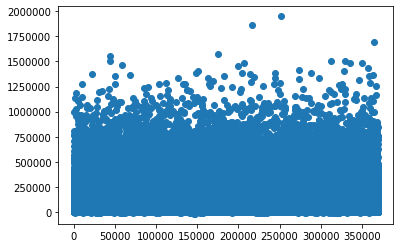

In [223]:
plt.scatter(df_res1['Instance'],df_res1['Total Yearly Income [EUR]'])
plt.show()